In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
PROJ_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))

In [3]:
def _get_datasplit_results(test_log_path):
    """
    Get testing results of datasplit experiments.
    """
    datasplit_results = {'rdp': [],
                     'ori_err': [],
                     'xyz_err': []}

    with open(test_log_path, 'r') as f:
        for line in f:
            if line.startswith('Separated test log: '):
                this_result_path = line.replace('Separated test log: ', '')
    #             print(this_result_path)

                # basename looks like EPFL-unc-e100-lr0.0003-datasplit-fold0-rdp0.10-tiny
                model_basename = os.path.basename(os.path.dirname(this_result_path))

                k_fold_idx = model_basename.split('-')[-3]
                assert 'fold' in k_fold_idx
                k_fold_idx = int(k_fold_idx.replace('fold', ''))

                real_data_prop = model_basename.split('-')[-2]
                assert 'rdp' in real_data_prop
                real_data_prop = float(real_data_prop.replace('rdp', ''))

                datasplit_results['rdp'].append(real_data_prop)
            else:
                metrics = line.split(' ')
                datasplit_results['ori_err'].append(float(metrics[0]))
                datasplit_results['xyz_err'].append(float(metrics[1]) / 100.0)
                
    datasplit_matrix = np.stack([datasplit_results['rdp'], datasplit_results['ori_err'], datasplit_results['xyz_err']])
    datasplit_matrix = datasplit_matrix[:, np.argsort(datasplit_matrix[0, :])]  # reorder by rdp
    datasplit_matrix[0, :] *= 0.8  # proportion among the overall dataset, as we choose 5-fold cross-validation
    return datasplit_matrix, datasplit_results

Text(0, 0.5, 'XYZ error (m)')

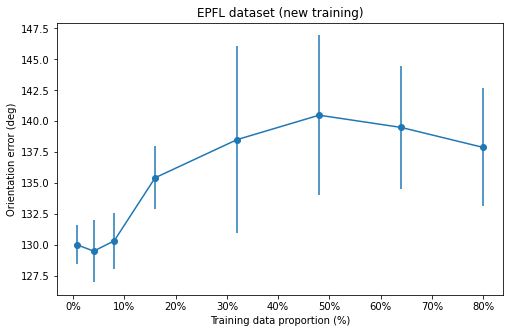

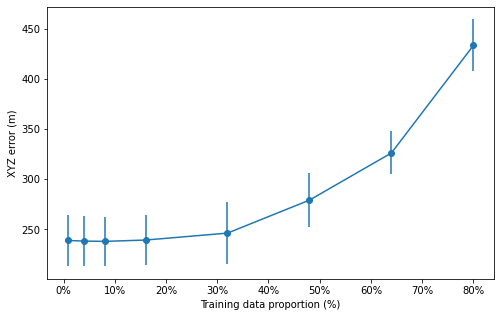

In [4]:
dataset_nm = 'EPFL'
test_log_path = os.path.join(PROJ_DIR, 'output/test_log/all_results_test_{:s}_.txt'.format(dataset_nm))

datasplit_matrix, _ = _get_datasplit_results(test_log_path)

plt.figure(figsize=(8, 5))
ax = plt.gca()

x_ls = sorted(np.unique(datasplit_matrix[0, :] * 100))
y_ls = datasplit_matrix[1, :].reshape(len(x_ls), -1)
mean_ls = np.mean(y_ls, axis=1)
std_ls = np.std(y_ls, axis=1)
ax.errorbar(x_ls, mean_ls, yerr=std_ls, fmt='-o')

ax.set_xlabel("Training data proportion (%)")
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("Orientation error (deg)")
ax.set_title("EPFL dataset (new training)")

plt.figure(figsize=(8, 5))
ax = plt.gca()

x_ls = sorted(np.unique(datasplit_matrix[0, :] * 100))
y_ls = datasplit_matrix[2, :].reshape(len(x_ls), -1)
mean_ls = np.mean(y_ls, axis=1)
std_ls = np.std(y_ls, axis=1)
ax.errorbar(x_ls, mean_ls, yerr=std_ls, fmt='-o')

ax.set_xlabel("Training data proportion (%)")
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("XYZ error (m)")

Text(0, 0.5, 'XYZ error (m)')

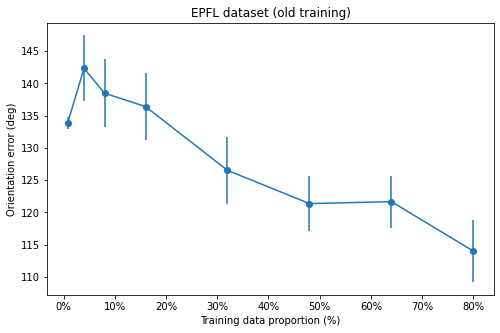

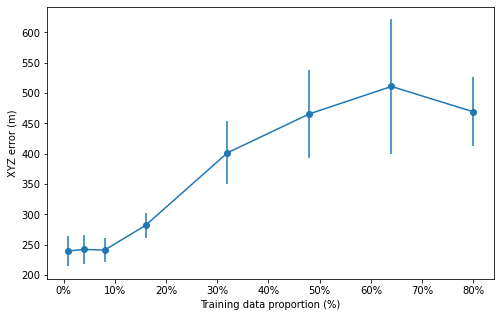

In [5]:
dataset_nm = 'EPFL'
test_log_path = os.path.join(PROJ_DIR, 'output/test_log/old/all_results_test_{:s}_.txt'.format(dataset_nm))

datasplit_matrix, _ = _get_datasplit_results(test_log_path)

plt.figure(figsize=(8, 5))
ax = plt.gca()

x_ls = sorted(np.unique(datasplit_matrix[0, :] * 100))
y_ls = datasplit_matrix[1, :].reshape(len(x_ls), -1)
mean_ls = np.mean(y_ls, axis=1)
std_ls = np.std(y_ls, axis=1)
ax.errorbar(x_ls, mean_ls, yerr=std_ls, fmt='-o')

ax.set_xlabel("Training data proportion (%)")
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("Orientation error (deg)")
ax.set_title("EPFL dataset (old training)")

plt.figure(figsize=(8, 5))
ax = plt.gca()

x_ls = sorted(np.unique(datasplit_matrix[0, :] * 100))
y_ls = datasplit_matrix[2, :].reshape(len(x_ls), -1)
mean_ls = np.mean(y_ls, axis=1)
std_ls = np.std(y_ls, axis=1)
ax.errorbar(x_ls, mean_ls, yerr=std_ls, fmt='-o')

ax.set_xlabel("Training data proportion (%)")
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("XYZ error (m)")

Text(0, 0.5, 'XYZ error (m)')

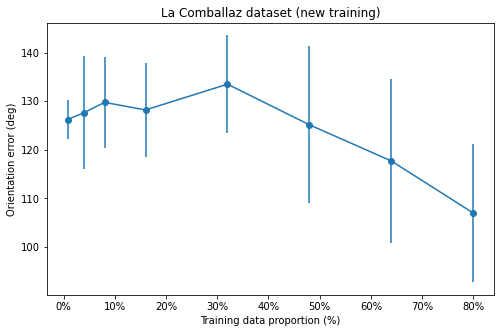

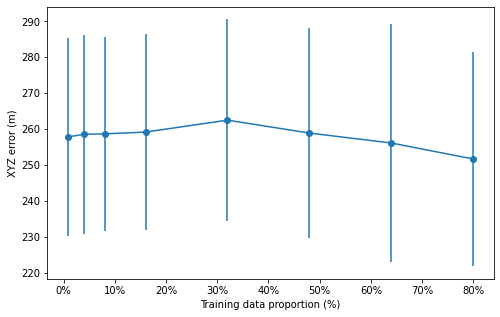

In [6]:
dataset_nm = 'comballaz'
test_log_path = os.path.join(PROJ_DIR, 'output/test_log/old/all_results_test_{:s}_.txt'.format(dataset_nm))

datasplit_matrix, _ = _get_datasplit_results(test_log_path)

plt.figure(figsize=(8, 5))
ax = plt.gca()

x_ls = sorted(np.unique(datasplit_matrix[0, :] * 100))
y_ls = datasplit_matrix[1, :].reshape(len(x_ls), -1)
mean_ls = np.mean(y_ls, axis=1)
std_ls = np.std(y_ls, axis=1)
ax.errorbar(x_ls, mean_ls, yerr=std_ls, fmt='-o')

ax.set_xlabel("Training data proportion (%)")
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("Orientation error (deg)")
ax.set_title("La Comballaz dataset (new training)")

plt.figure(figsize=(8, 5))
ax = plt.gca()

x_ls = sorted(np.unique(datasplit_matrix[0, :] * 100))
y_ls = datasplit_matrix[2, :].reshape(len(x_ls), -1)
mean_ls = np.mean(y_ls, axis=1)
std_ls = np.std(y_ls, axis=1)
ax.errorbar(x_ls, mean_ls, yerr=std_ls, fmt='-o')

ax.set_xlabel("Training data proportion (%)")
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("XYZ error (m)")

Text(0, 0.5, 'XYZ error (m)')

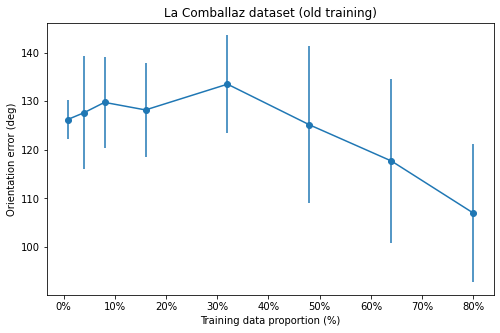

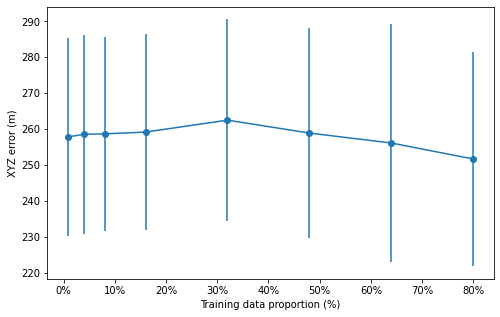

In [7]:
dataset_nm = 'comballaz'
test_log_path = os.path.join(PROJ_DIR, 'output/test_log/old/all_results_test_{:s}_.txt'.format(dataset_nm))

datasplit_matrix, _ = _get_datasplit_results(test_log_path)

plt.figure(figsize=(8, 5))
ax = plt.gca()

x_ls = sorted(np.unique(datasplit_matrix[0, :] * 100))
y_ls = datasplit_matrix[1, :].reshape(len(x_ls), -1)
mean_ls = np.mean(y_ls, axis=1)
std_ls = np.std(y_ls, axis=1)
ax.errorbar(x_ls, mean_ls, yerr=std_ls, fmt='-o')

ax.set_xlabel("Training data proportion (%)")
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("Orientation error (deg)")
ax.set_title("La Comballaz dataset (old training)")

plt.figure(figsize=(8, 5))
ax = plt.gca()

x_ls = sorted(np.unique(datasplit_matrix[0, :] * 100))
y_ls = datasplit_matrix[2, :].reshape(len(x_ls), -1)
mean_ls = np.mean(y_ls, axis=1)
std_ls = np.std(y_ls, axis=1)
ax.errorbar(x_ls, mean_ls, yerr=std_ls, fmt='-o')

ax.set_xlabel("Training data proportion (%)")
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel("XYZ error (m)")